# Tutorial 2, Question 4: the linear neuron

In [1]:
import tensorflow as tf
import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
no_epochs = 1000
lr = 0.05

SEED = 10
np.random.seed(SEED)

In [3]:
# generate data
no_data = 25
X = np.random.rand(no_data,3)
X[:, 2] = X[:,0]*X[:,1]
Y = 1.5+3.3*X[:,0]-2.5*X[:,1]+0.2*X[:,2]
Y = Y.reshape(no_data,1)

Text(0.5, 0.92, 'Targets for Training')

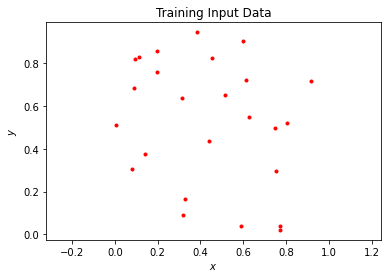

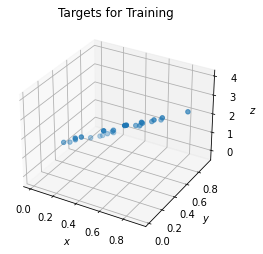

In [4]:
# plot data
plt.figure(1)
plt.plot(X[:,0], X[:,1], 'r.')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Training Input Data')
plt.axis('equal')

fig = plt.figure(2)
ax = plt.axes(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y[:,0], 'b.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Targets for Training')

In [5]:
# class for a linear neuron
class Linear(object):
  def __init__(self):
    self.w = tf.Variable(np.random.rand(3,1), dtype=tf.float64)
    self.b = tf.Variable(0., dtype=tf.float64)

  def __call__(self, x):
    return tf.matmul(x, self.w) + self.b

In [6]:
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

In [7]:
# funtion executing a training step
def train_step(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])

  model.w.assign(model.w - learning_rate * dw)
  model.b.assign(model.b - learning_rate * db)

In [8]:
# create a linear neuron
model = Linear()
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

w: [[0.04309736]
 [0.87991517]
 [0.76324059]], b: 0.0


In [9]:
mse = []
for epoch in range(no_epochs):
    
    loss_ = loss(model(X), Y)
    train_step(model, X, Y, learning_rate=lr)

    mse.append(loss_)
  
    if epoch%100 == 0:
        print('epoch: {}, mse: {}'.format(epoch, mse[-1]))

epoch: 0, mse: 3.189043491430746
epoch: 100, mse: 0.33725537364553326
epoch: 200, mse: 0.05168880277212707
epoch: 300, mse: 0.008428964187323163
epoch: 400, mse: 0.0015404557719953282
epoch: 500, mse: 0.00034887112897304877
epoch: 600, mse: 0.00011635757570895978
epoch: 700, mse: 6.333710283273134e-05
epoch: 800, mse: 4.8490824636845095e-05
epoch: 900, mse: 4.285557822089856e-05


Text(0.5, 1.0, 'learning curve for linear neuron')

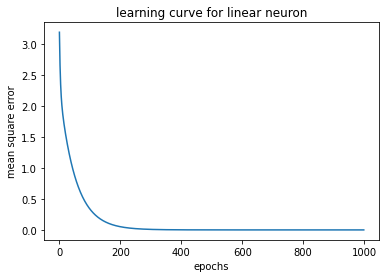

In [10]:
# plot learning curves
plt.figure(3)
plt.plot(range(no_epochs), mse)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.title('learning curve for linear neuron')

In [11]:
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
print('mse: {}'.format(loss(model(X), Y)))

w: [[ 3.24902136]
 [-2.54615674]
 [ 0.29412347]], b: 1.5267642964299881
mse: 3.971422215747363e-05


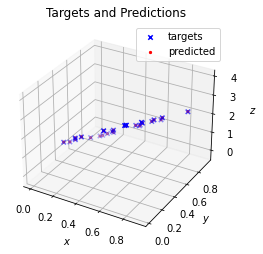

In [12]:
# plot trained and predicted points
fig = plt.figure(4)
ax = plt.axes(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y[:,0], color='blue', marker='x', label='targets')
ax.scatter(X[:,0], X[:,1], model(X)[:,0], color='red', marker='.', label='predicted')
ax.set_title('Targets and Predictions')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.legend()

Text(0.5, 0, '$z$')

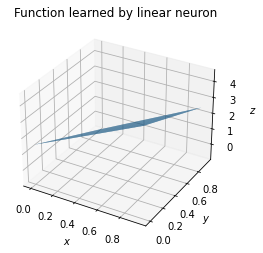

In [13]:
# plot the learned function
fig = plt.figure(5)
ax = plt.axes(projection = '3d')
X1 = np.arange(0, 1, 0.05)
X2 = np.arange(0, 1, 0.05)
X1,X2 = np.meshgrid(X1,X2)
w_, b_ = model.w.numpy(), model.b.numpy()
Z = b_+ w_[0]*X1+w_[1]*X2 + w_[2]*X1*X2
regression_plane = ax.plot_surface(X1, X2, Z)
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 0.2, offset=0.0))
ax.yaxis.set_major_locator(ticker.IndexLocator(base = 0.2, offset=0.0))
ax.set_title('Function learned by linear neuron')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')